In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("/content/Women_Frailty.csv")

In [4]:
data.head()

,Height,Weight,Age,Grip Strength,Frailty
0,65.8,112,30,30,N
1,71.5,136,19,31,N
2,69.4,153,45,29,N
3,68.2,142,22,28,Y
4,67.8,144,29,24,Y


In [5]:
data.columns

Index(['Height', 'Weight', 'Age', 'Grip Strength', 'Frailty'], dtype='object')

In [6]:
data.columns = data.columns.str.lower()

In [7]:
data.head()

,height,weight,age,grip strength,frailty
0,65.8,112,30,30,N
1,71.5,136,19,31,N
2,69.4,153,45,29,N
3,68.2,142,22,28,Y
4,67.8,144,29,24,Y


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   height         10 non-null     float64
 1   weight         10 non-null     int64  
 2   age            10 non-null     int64  
 3   grip strength  10 non-null     int64  
 4   frailty        10 non-null     object 
dtypes: float64(1), int64(3), object(1)
memory usage: 528.0+ bytes


**BMI Calculation**

In [9]:
# Calculate BMI from weight & height

data['bmi'] = (703 * (data['weight']))/(data['height'] ** 2)
data['bmi'] = data['bmi'].round(2)

# Calculate grip strength in pounds
data['grip_strength_lbs'] = data['grip strength'] * 2.20462  # Conversion factor from KGS to LBS
data['grip_strength_lbs'] = data['grip_strength_lbs'].round(2)
# Calculate frailty index
# Got this from open source
data['frailty_index'] = (data['height'] / data['weight']) * data['age'] + (data['grip_strength_lbs'] / data['weight']) * data['age']
data['frailty_index'] = data['frailty_index'].round(2)

# Display the DataFrame with frailty index
print(data)

   height  weight  age  grip strength frailty    bmi  grip_strength_lbs  \
0    65.8     112   30             30      N   18.19              66.14   
1    71.5     136   19             31      N   18.70              68.34   
2    69.4     153   45             29      N   22.33              63.93   
3    68.2     142   22             28      Y   21.46              61.73   
4    67.8     144   29             24      Y   22.02              52.91   
5    68.7     123   50             26      N   18.32              57.32   
6    69.8     141   51             22      Y   20.35              48.50   
7    70.1     136   23             20      Y   19.46              44.09   
8    67.9     112   17             19      N   17.08              41.89   
9    66.8     120   39             31      N   18.91              68.34   

   frailty_index  
0          35.34  
1          19.54  
2          39.21  
3          20.13  
4          24.31  
5          51.23  
6          42.79  
7          19.31  
8  

In [10]:
data.to_csv("/content/cleaned_women_frailty.csv")

**DATA VISUALIZATION**

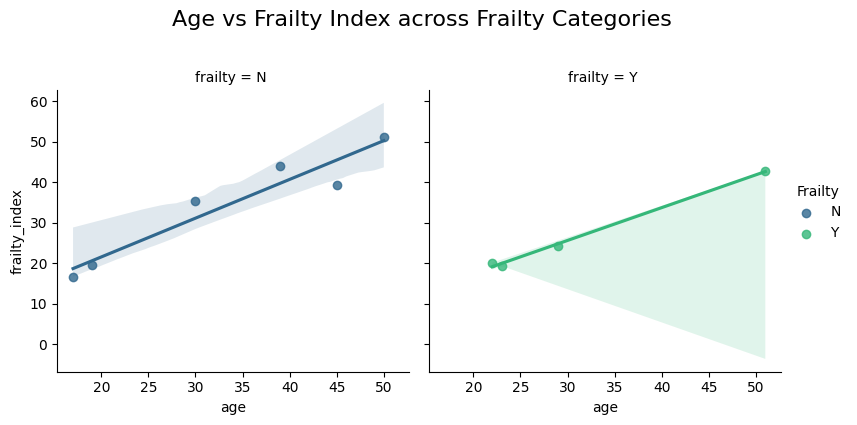

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and it contains 'age', 'frailty_index', and a categorical 'frailty' column

# Create a FacetGrid. Each grid element will show a regression line for 'age' vs 'frailty_index' for a different 'frailty' category
g = sns.FacetGrid(data, col='frailty', hue='frailty', palette='viridis', height=4, aspect=1)
g = g.map(sns.regplot, 'age', 'frailty_index').add_legend(title='Frailty')

g.fig.suptitle('Age vs Frailty Index across Frailty Categories', fontsize=16, y=1.05)
plt.subplots_adjust(top=0.85)  # Adjust the top to make space for suptitle

# Save the figure
g.savefig('/content/Results/Age_vs_Frailty_FacetGrid.jpg')
plt.show()

**BMI Vs Frailty status**

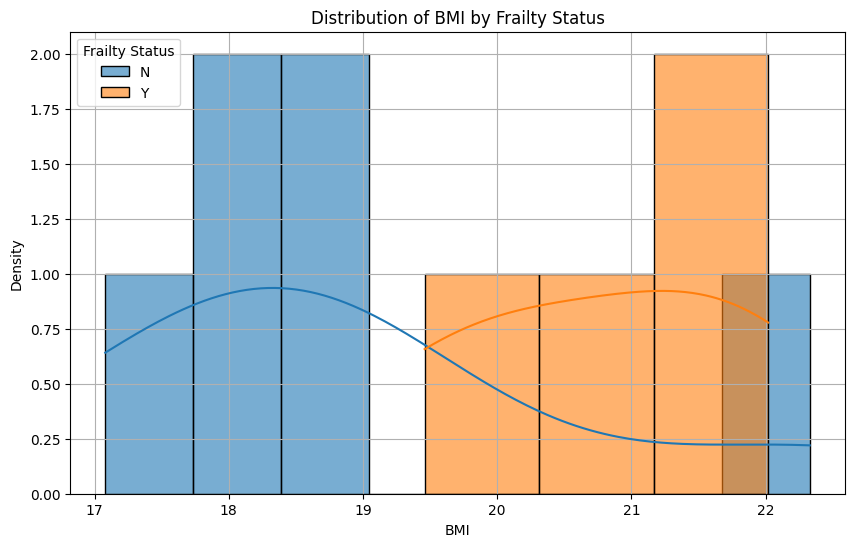

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and it contains 'bmi' and a categorical 'frailty' column

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Loop through each frailty status to create a histogram with KDE
for frailty_status in data['frailty'].unique():
    subset = data[data['frailty'] == frailty_status]
    sns.histplot(subset['bmi'], kde=True, label=str(frailty_status), alpha=0.6)

plt.title('Distribution of BMI by Frailty Status')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.grid(True)
plt.legend(title='Frailty Status')

# Save the figure
plt.savefig('/content/Results/bmi_vs_frailty_status_histogram.png')
plt.show()

**Average of Grip strength by Frailty Status**

<ipython-input-14-a6ca0520ef11>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='frailty', y='bmi', data=data, palette='Set2', showfliers=False)  # 'showfliers=False' hides outliers to clean up the plot


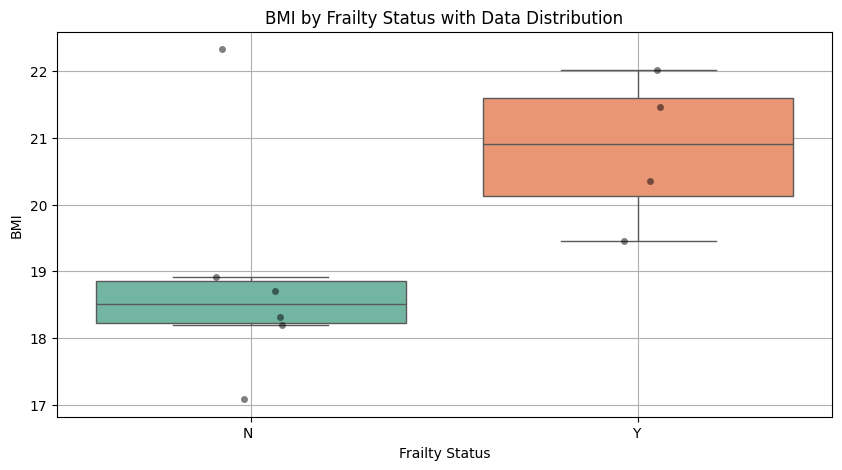

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
# Box plot
sns.boxplot(x='frailty', y='bmi', data=data, palette='Set2', showfliers=False)  # 'showfliers=False' hides outliers to clean up the plot
# Strip plot with jitter
sns.stripplot(x='frailty', y='bmi', data=data, color='black', alpha=0.5, jitter=True)  # 'jitter=True' spreads out the points to reduce overlap

plt.title('BMI by Frailty Status with Data Distribution')
plt.xlabel('Frailty Status')
plt.ylabel('BMI')
plt.grid(True)

# Adjust the file save path to work in this environment
plt.savefig('/content/Results/bmi_vs_frailty_stripplot.png')
plt.show()